In [0]:
#Este programa é o desafio da diciplina FAM do bootcamp de MLE

In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sn #biblioteca utilizada para os plots mais bonitos
from sklearn.model_selection import train_test_split #biblioteca para a divisão do dataset entre treinamento e teste
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
from scipy import stats #biblioteca para analises estatisticas
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear univariada
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
from sklearn.preprocessing import MinMaxScaler #Função de processamento para normatizar variável
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor
from sklearn import metrics #biblioteca para metricas dos modelos


In [2]:
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
#realizando a leitura do arquivo (dataset)
df = pd.read_csv("comp_bikes_mod.csv")

In [31]:
#apresentando as 5 primeiras linhas do dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,,1.0,0.0,1.0,0.0,0.0,6.0,0.000000,1.00000,0.497062,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.000000,1.42395,0.220000,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.000000,1.00000,0.220000,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.000000,1.00000,0.240000,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.682118,1.00000,0.240000,0.2879,0.75,0.0,0.0,1.0,1.0


In [5]:
df.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [28]:
df.isnull().sum()

instant          0
dteday        1738
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

**Existem Colunas Com Valores Nulos?**

In [7]:
# Tamando do dataset
df.shape

(17379, 17)

**Quantas Instâncias e Características Existem no Dataset?**



In [8]:
#analisando a "estatística" do dataset
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Qual é o Valor Médio Para os Pesos Declarados?**

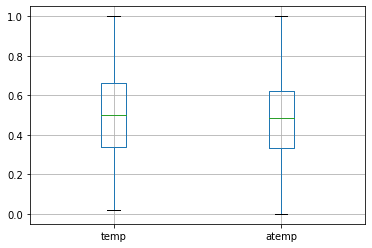

In [15]:
#identificando possíveis outliers
df[['temp','atemp']].boxplot();

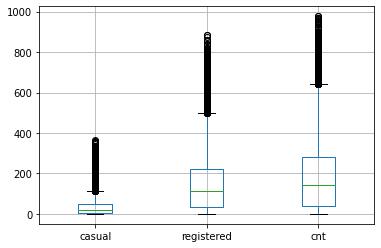

In [16]:
df[['casual','registered','cnt']].boxplot();

In [21]:
#Z-score
z = np.abs(stats.zscore(df['cnt'].values))
threshold = 3
result = np.where(z > threshold)

cnt_outlier = df.iloc[result[0]]
cnt_outlier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Existem Possíveis Outliers?**

**Tratando valores nulos**

In [0]:
df.fillna(df.mean(), inplace=True)
df['dteday'].fillna('', inplace=True) 

**Criando modelos**

In [0]:
#realizando a análise de regressão
x = df[['temp']]  #variável independente 
Y = df.cnt #variável dependente 

In [0]:
#Realiza a construção do modelo de regressão
reg = LinearRegression()
regressao = reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)

In [40]:
#análise do modelo
previsao = reg.predict(x)

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.2180607651819264


**Pelo Coefiente de Determinação, o Que É Possível Afirmar Sobre a Relação Entre as Variáveis temp x cnt?**

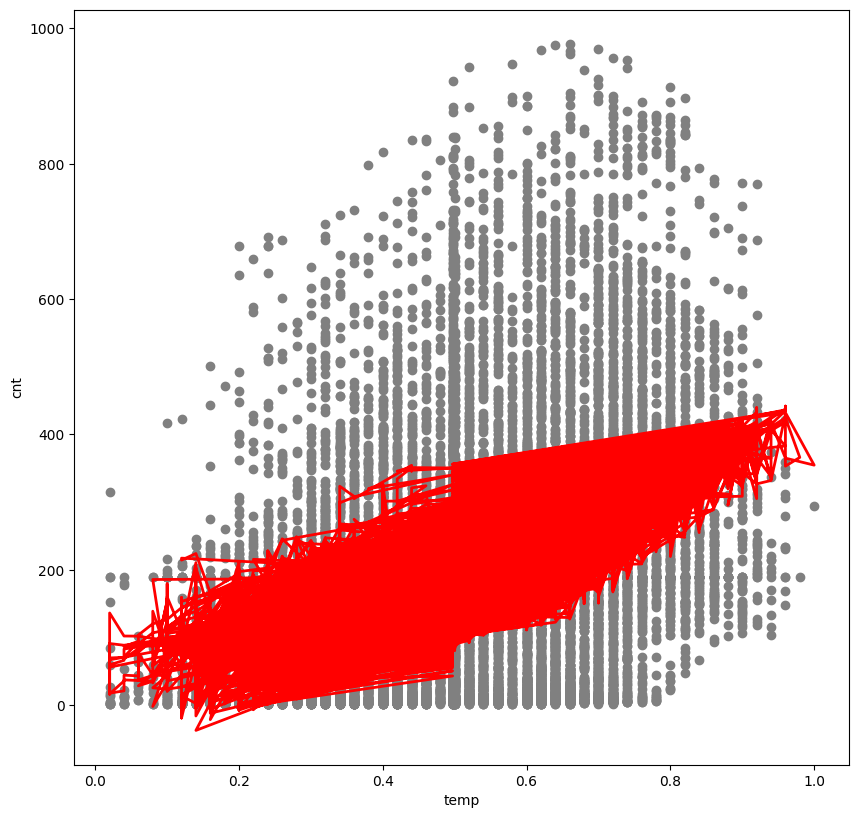

In [42]:
#realiza o plot dos dados
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

In [0]:
#analisando a correlação entre os dados

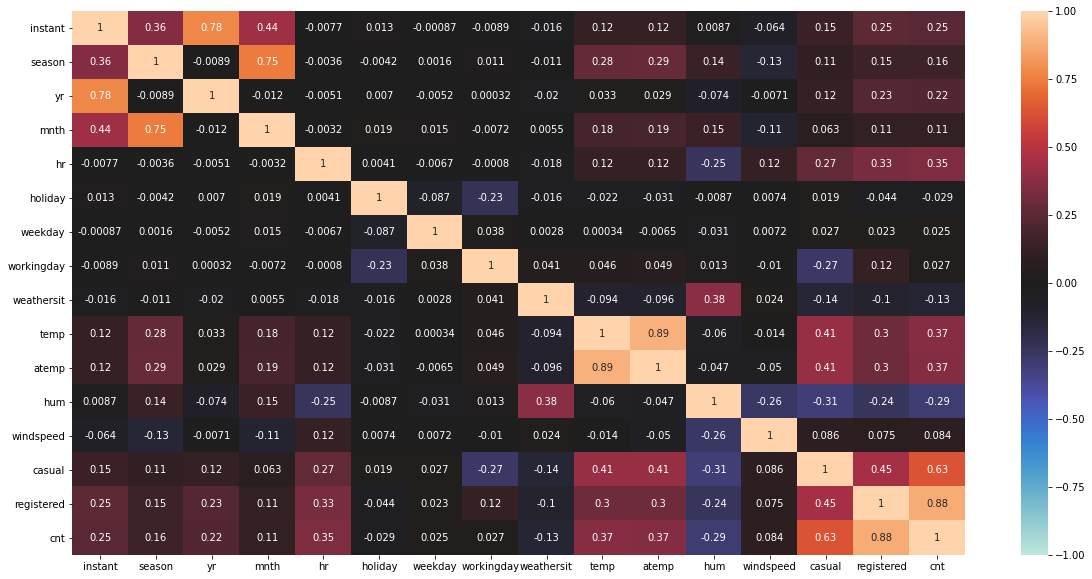

In [43]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(20, 10))
matriz_de_correlação = df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

**Criando um novo Dataset com alguma variáveis**

In [0]:
new_df = df[['holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]  

**Regressão Com Árvore de Decisão**

In [51]:
# Normalizando as variáveis do dataset
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df)

array([[0.        , 1.        , 0.        , ..., 0.81      , 0.        ,
        0.01536885],
       [0.        , 1.        , 0.        , ..., 0.8       , 0.        ,
        0.03995902],
       [0.        , 1.        , 0.        , ..., 0.8       , 0.        ,
        0.0317623 ],
       ...,
       [0.        , 0.16666667, 1.        , ..., 0.6       , 0.19301751,
        0.09118852],
       [0.        , 0.16666667, 1.        , ..., 0.56      , 0.15786999,
        0.06147541],
       [0.        , 0.16666667, 1.        , ..., 0.65      , 0.15786999,
        0.04918033]])

In [0]:
entrada_arvore=scaled_df[:,7].reshape(-1,1) #entrada para a regressão via árvore
saida_arvore=scaled_df[:,8].reshape(-1,1) #saída para a regressão via árvore

In [0]:
x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=42) #divisão entre treinamento e teste

In [54]:
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x_train, y_train) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#realiza a previsão
previsao_arvore=arvore_regressora.predict(x_test)

In [58]:
print('Erro absoluto:', metrics.mean_absolute_error(y_test, previsao_arvore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, previsao_arvore))

Erro absoluto: 0.13206720996321986
Mean Squared Error: 0.030075725452780526


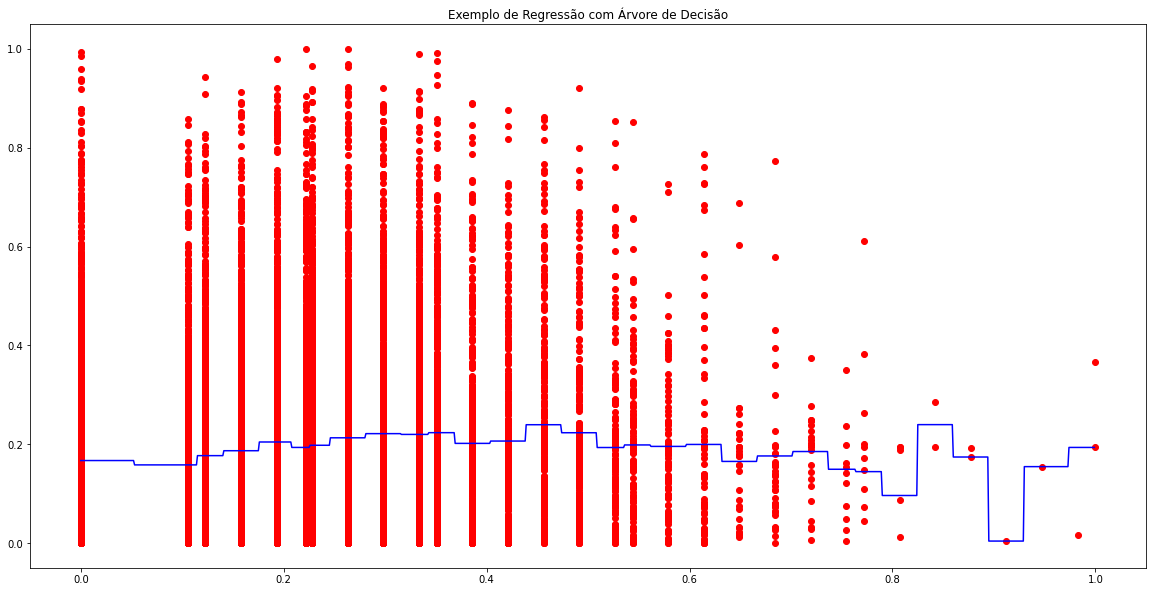

In [60]:
plt.figure(figsize=(20, 10))
X_grid = np.arange(min(entrada_arvore), max(entrada_arvore), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(entrada_arvore,saida_arvore, color = 'red')
plt.plot(X_grid, arvore_regressora.predict(X_grid), color = 'blue')
plt.title('Exemplo de Regressão com Árvore de Decisão')
plt.show()

In [0]:
df = pd.read_csv("comp_bikes_mod.csv")

In [63]:
# Questão 1
df.shape

(17379, 17)

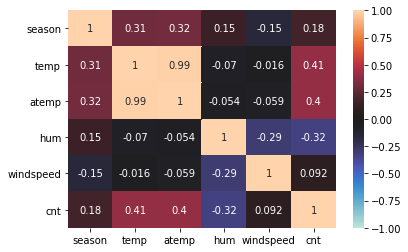

In [77]:
# Questão 2
df2 = df.dropna(subset=['dteday'])
df2 = df2[["season", "temp", "atemp", "hum", "windspeed", "cnt"]]
sn.heatmap(df2.corr(), annot=True,vmin=-1, vmax=1,center= 0)

In [86]:
# Questão 3
null_temp = (df['temp'].isna().sum()/df.shape[0]).round(2)
print('Procentagem de valores nulos coluna temp: ','{:2%}'.format(null_temp))

Procentagem de valores nulos coluna temp:  10.000000%


In [91]:
# Questão 4
df4 = df[["hum","cnt","casual"]]
df4.fillna(df4.mean(), inplace=True)

#realizando a análise de regressão
x = df4[["hum","casual"]]  #variável independente 
Y = df4.cnt #variável dependente 

#Realiza a construção do modelo de regressão
reg = LinearRegression()
regressao = reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)
previsao = reg.predict(x)
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.40561165206692495


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


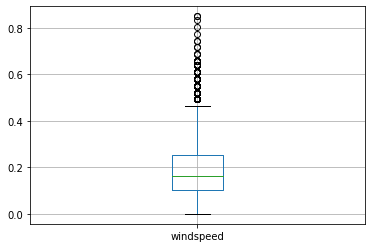

In [92]:
# Questão 5
df5 = df.dropna(subset=['dteday'])
df5[['windspeed']].boxplot();

In [95]:
# Questão 6 - ERRADA
df6 = df[["hum","cnt","casual"]]
df6.fillna(df6.mean(), inplace=True)

# Normalizando as variáveis do dataset
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df6)

entrada_arvore=scaled_df[:,1].reshape(-1,1) #entrada para a regressão via árvore
saida_arvore=scaled_df[:,2].reshape(-1,1) #saída para a regressão via árvore

x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=42) #divisão entre treinamento e teste

arvore_regressora = DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x_train, y_train) #aplica a regressão

previsao_arvore = arvore_regressora.predict(x_test)

R_2 = r2_score(y_test, previsao_arvore)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.3124678130753076


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
# Questão 7

# Arvore de decisão pode ser utilizada para classificação e regressão.

In [96]:
# Questão 8
df8 = df.dropna(subset=['dteday'])
df8.shape

(15641, 17)

In [101]:
# Questão 9
df9 = df.dropna(subset=['dteday'])
df9['season'].nunique()

4

In [102]:
# Questão 10
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [114]:
# Questão 11 - ERRADA
df11 = df[["hum","cnt","casual"]]
df11.fillna(df11.mean(), inplace=True)

# Normalizando as variáveis do dataset
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df11)

entrada_arvore=scaled_df[:,1].reshape(-1,1) #entrada para a regressão via árvore
saida_arvore=scaled_df[:,2].reshape(-1,1) #saída para a regressão via árvore

x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=42) #divisão entre treinamento e teste

arvore_regressora = DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x_train, y_train) #aplica a regressão

previsao_arvore = arvore_regressora.predict(x_test)

R_2 = r2_score(y_test, previsao_arvore)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.3124678130753076


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [115]:
# Questão 12
df12 = df.dropna(subset=['dteday'])
df12['windspeed'].std()

0.12230930508286268

In [116]:
# Questão 13
df13 = df.dropna(subset=['dteday'])
df13['dteday'] = pd.to_datetime(df13['dteday'])
print('última data presente no dataset: ', df13['dteday'].max())

última data presente no dataset:  2012-12-31 00:00:00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
# Questão 14
df14 = df.dropna(subset=['dteday'])
print('A média da coluna temp: ', df14['temp'].mean())

A média da coluna temp:  0.4969259206597582


In [0]:
# Questão 15 - ERRADA

